In [33]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [34]:
# Загрузка данных
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255



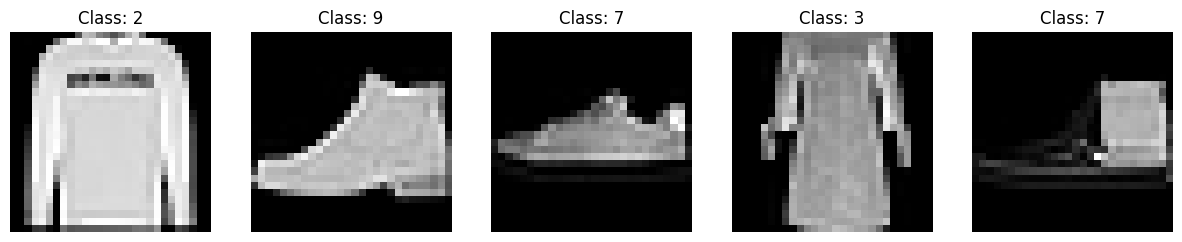

In [35]:
import random

indices = random.sample(range(len(train_images)), 5)

fig, axs = plt.subplots(1, 5, figsize=(15, 15))

for i, idx in enumerate(indices):
    img = np.reshape(train_images[idx], (28, 28))
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')

    axs[i].set_title("Class: {}".format(train_labels[idx]))
    

In [36]:
print(train_images.shape)
print(type(train_images[0]))
print(len(train_images[0]))

(60000, 28, 28, 1)
<class 'numpy.ndarray'>
28


In [37]:
# Загрузка предобученной модели VGG16 без полносвязных слоев
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(56, 56, 3))
# Заморозка весов предобученной модели
base_model.trainable = False

# Определение модели
model = keras.Sequential([
    keras.layers.Conv2D(3, (1, 1), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.UpSampling2D((2, 2)),
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Компиляция модели
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 3)         6         
                                                                 
 up_sampling2d_6 (UpSampling  (None, 56, 56, 3)        0         
 2D)                                                             
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                32832     
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                      

In [39]:
# Обучение модели

history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)
                    

Epoch 1/10
375/375 [==============================] - 37s 97ms/step - loss: 0.6419 - accuracy: 0.7901 - val_loss: 0.4663 - val_accuracy: 0.8323
Epoch 2/10
375/375 [==============================] - 36s 95ms/step - loss: 0.4296 - accuracy: 0.8439 - val_loss: 0.4242 - val_accuracy: 0.8454
Epoch 3/10
375/375 [==============================] - 36s 95ms/step - loss: 0.3916 - accuracy: 0.8555 - val_loss: 0.4022 - val_accuracy: 0.8523
Epoch 4/10
375/375 [==============================] - 36s 95ms/step - loss: 0.3704 - accuracy: 0.8646 - val_loss: 0.3925 - val_accuracy: 0.8575
Epoch 5/10
375/375 [==============================] - 36s 95ms/step - loss: 0.3567 - accuracy: 0.8695 - val_loss: 0.3720 - val_accuracy: 0.8632
Epoch 6/10
375/375 [==============================] - 34s 91ms/step - loss: 0.3450 - accuracy: 0.8731 - val_loss: 0.3634 - val_accuracy: 0.8670
Epoch 7/10
375/375 [==============================] - 34s 91ms/step - loss: 0.3354 - accuracy: 0.8756 - val_loss: 0.3527 - val_accuracy:

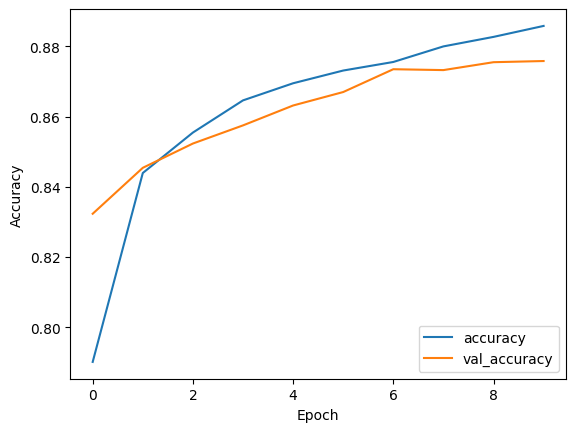

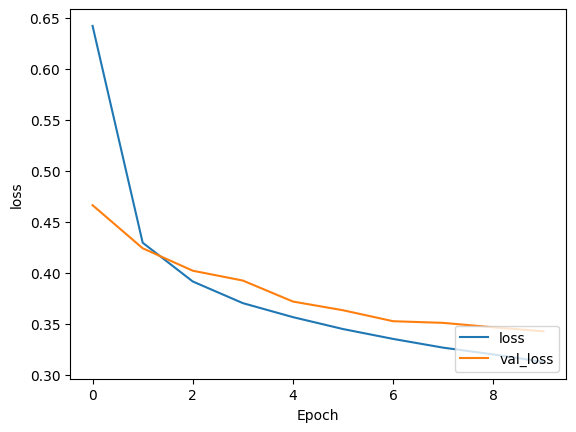

In [40]:
import matplotlib.pyplot as plt

# Графики обучения
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()

In [43]:
# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 4s 14ms/step - loss: 0.3713 - accuracy: 0.8699
Test accuracy: 0.8698999881744385


1/1 [==============================] - 0s 220ms/step
6
1/1 [==============================] - 0s 37ms/step
4
1/1 [==============================] - 0s 26ms/step
1
1/1 [==============================] - 0s 26ms/step
2
1/1 [==============================] - 0s 28ms/step
7


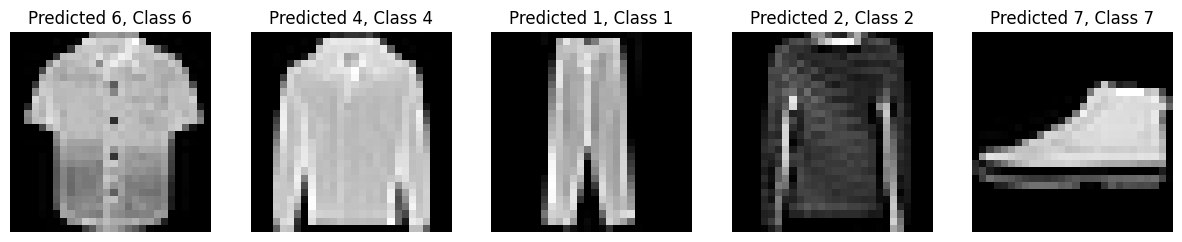

In [44]:
indices = random.sample(range(len(test_images)), 5)

fig, axs = plt.subplots(1, 5, figsize=(15, 15))

for i, idx in enumerate(indices):
    img = np.reshape(test_images[idx], (28, 28))
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')

    pred = np.argmax(model.predict(np.array([test_images[idx]])))
    print(test_labels[idx])
    axs[i].set_title("Predicted {}, Class {}".format(pred, test_labels[idx]))

In [45]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 56, 56, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 56, 56, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 56, 56, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 28, 28, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 28, 28, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 28, 28, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 14, 14, 128)       0     

In [46]:
base_model.trainable = True
set_trainable = False
for layer in base_model.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

        

In [47]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 3)         6         
                                                                 
 up_sampling2d_6 (UpSampling  (None, 56, 56, 3)        0         
 2D)                                                             
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                32832     
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                      

In [48]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 36s 97ms/step - loss: 0.3068 - accuracy: 0.8880 - val_loss: 0.3401 - val_accuracy: 0.8767
Epoch 2/10
375/375 [==============================] - 36s 95ms/step - loss: 0.3016 - accuracy: 0.8892 - val_loss: 0.3420 - val_accuracy: 0.8758
Epoch 3/10
375/375 [==============================] - 36s 95ms/step - loss: 0.2974 - accuracy: 0.8907 - val_loss: 0.3402 - val_accuracy: 0.8773
Epoch 4/10
375/375 [==============================] - 34s 91ms/step - loss: 0.2907 - accuracy: 0.8932 - val_loss: 0.3410 - val_accuracy: 0.8798
Epoch 5/10
375/375 [==============================] - 34s 91ms/step - loss: 0.2863 - accuracy: 0.8943 - val_loss: 0.3307 - val_accuracy: 0.8827
Epoch 6/10
375/375 [==============================] - 36s 95ms/step - loss: 0.2819 - accuracy: 0.8964 - val_loss: 0.3403 - val_accuracy: 0.8753
Epoch 7/10
375/375 [==============================] - 34s 91ms/step - loss: 0.2777 - accuracy: 0.8985 - val_loss: 0.3295 - val_accuracy:

In [49]:
# Оценка модели на тестовых данных после дообучения
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 4s 14ms/step - loss: 0.3411 - accuracy: 0.8816
Test accuracy: 0.881600022315979


Використовує VGG16 як згортковий основи приросту в точності моделі не дало, в порівнянні з моделью розробленою у минулрму ДЗ, навіть після виконання донавчання.